In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [39]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Training set has 891 rows and have 12 features 
* Testing  set has 418 rows and have 11 features
* The difference is the Survived feature

In [42]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Data Analysis

* *PassengerId* is the unique id of the row and it doesn't have any effect on target
* *Survived* is the target variable we are trying to predict (0 or 1):
  * 1 = Survived
  * 0 = Not Survived
* *Pclass* (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    * 1 = Upper Class
    * 2 = Middle Class
    * 3 = Lower Class
* *Name*, *Sex* and *Age* are self-explanatory
* *SibSp* is the total number of the passengers' siblings and spouse
* *Parch* is the total number of the passengers' parents and children
* *Ticket* is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

# Missing Values

In [43]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




* Training set have missing values in Age, Cabin and Embarked columns
* Test set have missing values in Age, Cabin and Fare columns
It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples.

The missing values in Age, Embarked and Fare are smaller compared to total sample(can be filled with descriptive statistical measures), but Cabin feature has almost 80% of missing data, which seems a good indicator to discard it. 


## Handle Missing Values in Age

Missing values in Age can filled with median age
> df_all.Age.fillna(training.Age.median())

- But using median age of the whole data set is not a good choice. 
- Median age of Pclass groups is the best choice because of its high correlation with Age (0.408106) and Survived (0.338481). It is also more logical to group ages by passenger classes instead of other features.

                  Age      Fare     Parch  PassengerId    Pclass     SibSp  \
Age          1.000000  0.178740 -0.150917     0.028814 -0.408106 -0.243699   
Fare         0.178740  1.000000  0.221539     0.031428 -0.558629  0.160238   
Parch       -0.150917  0.221539  1.000000     0.008942  0.018322  0.373587   
PassengerId  0.028814  0.031428  0.008942     1.000000 -0.038354 -0.055224   
Pclass      -0.408106 -0.558629  0.018322    -0.038354  1.000000  0.060832   
SibSp       -0.243699  0.160238  0.373587    -0.055224  0.060832  1.000000   
Survived    -0.077221  0.257307  0.081629    -0.005007 -0.338481 -0.035322   

             Survived  
Age         -0.077221  
Fare         0.257307  
Parch        0.081629  
PassengerId -0.005007  
Pclass      -0.338481  
SibSp       -0.035322  
Survived     1.000000  


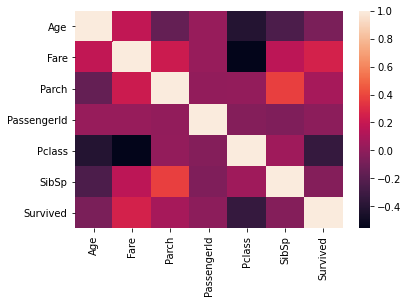

In [44]:
df_all_corr = df_all.corr()
print(df_all_corr)
sns.heatmap(df_all_corr)

In [45]:
df_all_corr= df_all_corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr

,level_0,level_1,0
0,Survived,Survived,1.000000
1,SibSp,SibSp,1.000000
2,Fare,Fare,1.000000
3,Parch,Parch,1.000000
4,Pclass,Pclass,1.000000
5,PassengerId,PassengerId,1.000000
6,Age,Age,1.000000
7,Fare,Pclass,0.558629
8,Pclass,Fare,0.558629
9,Age,Pclass,0.408106


In [46]:
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In order to be more accurate, **Sex** feature is used as the second level of groupby while filling the missing Age values.

As seen from below, Pclass and Sex groups have distinct median Age values.

- When passenger class increases, the median age for both males and females also increases. 
- However, females tend to have slightly lower median Age than males. The median ages below are used for filling the missing values in Age feature.

In [47]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

age_by_pclass_sex
                                                               

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [48]:
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


## Handling missing Values in Embarked feature
It is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. 

The mode Embarked value for an upper class female passenger is C (Cherbourg), but this doesn't necessarily mean that they embarked from that port.

In [49]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


According to Google Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.

In [50]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

## Handling Missing Values for FARE

In [51]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


There is only 1 passenger with missing Fare value. We can assume that Fare is related to family size (Parch and SibSp) and Pclass features. 
-> Median Fare value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [52]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp'])
med_fare_df = med_fare.Fare.median()
med_fare_df

Pclass  Parch  SibSp
1       0      0         31.33960
               1         75.25000
               2         51.47920
        1      0         63.35830
               1         83.15830
        2      0         83.15830
               1        120.00000
               2        262.37500
               3        263.00000
        3      1        262.37500
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         73.50000
               3         21.00000
        1      0         23.00000
               1         26.25000
               2         33.00000
        2      0         26.25000
               1         41.57920
        3      0         39.00000
               1         23.00000
               2         18.75000
3       0      0          7.85420
               1         14.45625
               2         19.83960
               3         16.92500
        1      0         12.47500
               1         15

In [53]:
print(med_fare_df[3][0][0])
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare_df[3][0][0])

7.8542


## Handling Missing Values for Cabin feature
There are 1014 rows with Null values on Cabin feature.

The first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.

In [54]:
df_all['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))).value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: Cabin, dtype: int64

In [55]:
df_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [56]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'})

df_all_decks

Count
Deck Pclass       
A    1          22
B    1          65
C    1          94
D    1          40
     2           6
E    1          34
     2           4
     3           3
F    2          13
     3           8
G    3           5
M    1          67
     2         254
     3         693
T    1           1

In [61]:
df_all_decks = df_all_decks.transpose()
df_all_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

In [66]:
def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0] # if was levels[1], the results will be Pclass distributions   
    print("decks {}".format(decks))
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

In [90]:
def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#34eb46', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#34857f', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#8766e8', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()

In [77]:
all_deck_count, all_deck_percentage = get_pclass_dist(df_all_decks)
print("all_deck_count:{}\n all_deck_percentage:{}".format(all_deck_count, all_deck_percentage))

decks Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='object', name='Deck')
all_deck_count:{'A': {1: 22, 2: 0, 3: 0}, 'B': {1: 65, 2: 0, 3: 0}, 'C': {1: 94, 2: 0, 3: 0}, 'D': {1: 40, 2: 6, 3: 0}, 'E': {1: 34, 2: 4, 3: 3}, 'F': {1: 0, 2: 13, 3: 8}, 'G': {1: 0, 2: 0, 3: 5}, 'M': {1: 67, 2: 254, 3: 693}, 'T': {1: 1, 2: 0, 3: 0}}
 all_deck_percentage:{'A': [100.0, 0.0, 0.0], 'B': [100.0, 0.0, 0.0], 'C': [100.0, 0.0, 0.0], 'D': [86.95652173913044, 13.043478260869565, 0.0], 'E': [82.92682926829268, 9.75609756097561, 7.317073170731707], 'F': [0.0, 61.904761904761905, 38.095238095238095], 'G': [0.0, 0.0, 100.0], 'M': [6.607495069033531, 25.04930966469428, 68.34319526627219], 'T': [100.0, 0.0, 0.0]}


**What does this represent?**
- 100% of A, B and C decks are 1st class passengers
- Deck D has 87% 1st class and 13% 2nd class passengers
- Deck E has 83% 1st class, 10% 2nd class and 7% 3rd class passengers
- Deck F has 62% 2nd class and 38% 3rd class passengers
- 100% of G deck are 3rd class passengers

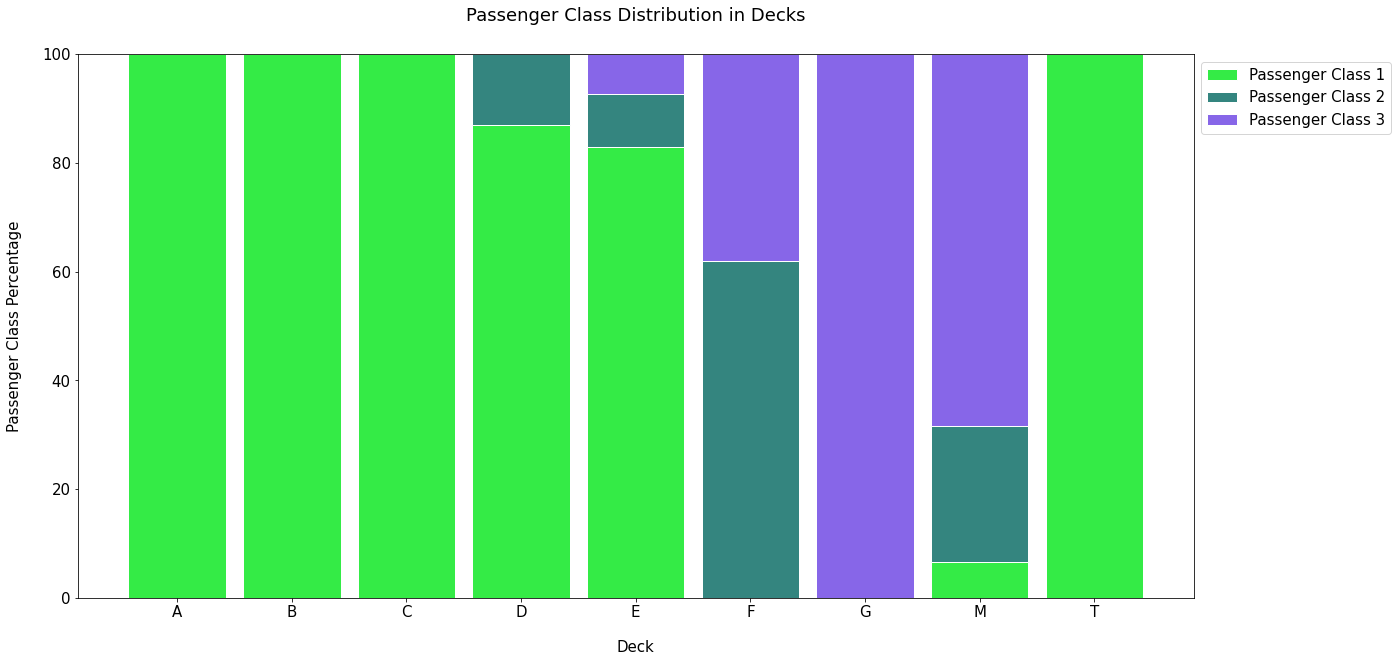

In [91]:
display_pclass_dist(all_deck_percentage)

- There is one person on the boat deck in T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A, B or C deck passengers so he is grouped with A deck
- Passengers labeled as M(Missing) are the missing values in Cabin feature. Quite a lot, we'll leave it as it is.

In [85]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

In [86]:
df_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Deck'],
      dtype='object')

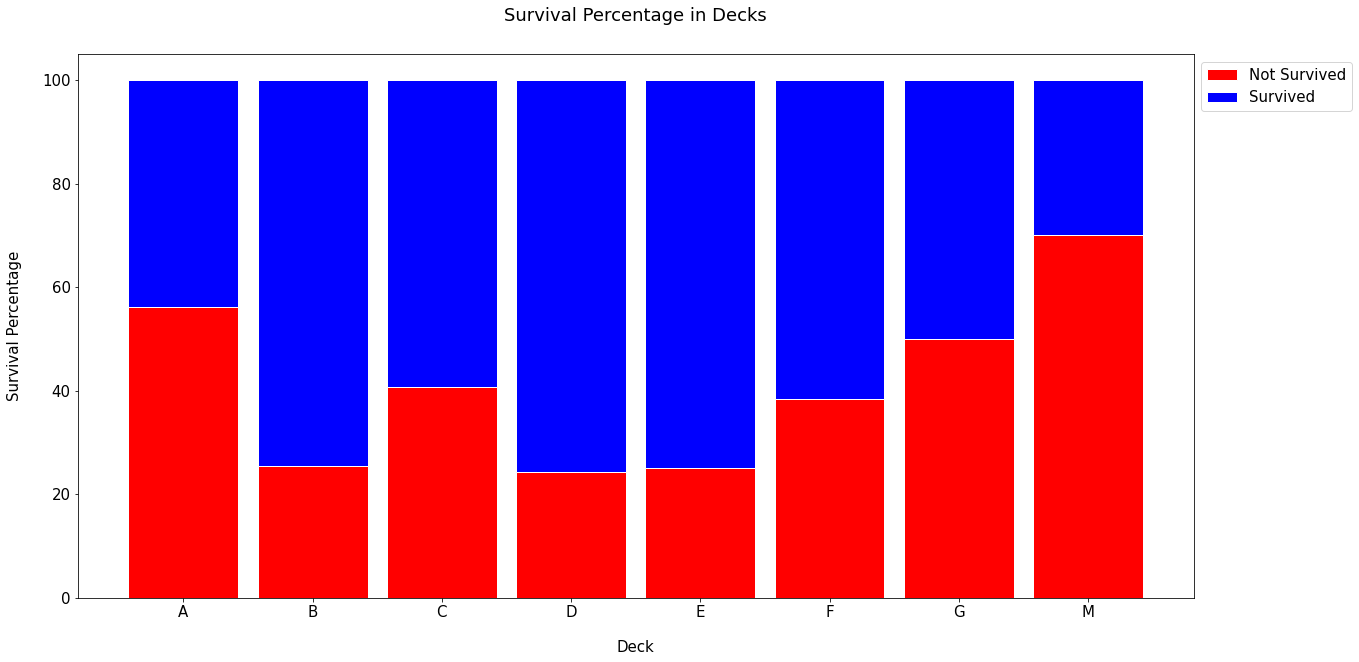

In [89]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'PassengerId',
                                                                                   'Pclass', 'Sex', 'SibSp', 'Ticket', ]).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='red', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='blue', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

 "Conclusions"
 - Deck B, C, D and E have the highest survival rates. Those decks are mostly occupied by 1st class passengers
 - On the other hand, M has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers.
 - Cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers.
 - Seems logic that missing values in M are more non surival results, as they couldn't retrieve the cabin data of the victims. 
 
Lets make groups on Decks, to decrese the number of new features:

- A, B and C decks are labeled as ABC because all of them have only 1st class passengers
- D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
- F and G decks are labeled as FG because of the same reason above
- M is very different itself from others and has the lowest survival rate.


In [92]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

# Finish Handling Missing Values

In [94]:
df_all.drop(['Cabin'], axis=1, inplace=True)
df_all.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64